# Imports

In [46]:
print('Loading libraries')
start_time <- Sys.time()
suppressPackageStartupMessages({
    library(data.table)
    library(ggplot2)
    library(ggpubr)
    library(dplyr)
    library(stringr)
    library(rstatix)
    library(tidyr)
    library(phenoptr)
    }
)
print('Library load finished')
print(Sys.time()-start_time)


hpc =  TRUE
work_desktop = FALSE
work_linux = TRUE
singularity = TRUE
prj =  "HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra"
if (!hpc){
    if (work_desktop){
        if (work_linux){
            base = paste0('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/' ,prj)
        }else{
            base =paste0('D:\\OneDrive - University of Pittsburgh\\Internal_Project_Data_2\\', prj)
        }
    }else{
        base = paste0('/home/brian/data/odrive/Internal_Project_Data_2/',prj)
    }
}else{
    if (singularity){
        base = '/mnt'
    }else{
        base = paste0('/ix/rbao/Projects/', prj)
    }
}
print(base)
inform.data <- file.path(base,'data','inform_data_exports')
results <- file.path(base,'results')
print(results)
fn <- 'cell_density_34_all_inc_tumor_stroma_20_percent_v1.csv'
df <- read.csv(file.path(results,fn))
head(df)


[1] "Loading libraries"
[1] "Library load finished"
Time difference of 1.040866 secs
[1] "/mnt"
[1] "/mnt/results"


,Sample.Name,study_id,total_roi,n_tumor_segments,n_stroma_segments,PDL1.panCK.tumor_percent,PDL1.panCK.stroma_percent,PDL1.panCK.all_percent,PDL1.panCKneg.CD3pos.tumor_percent,PDL1.panCKneg.CD3pos.stroma_percent,PDL1.panCKneg.CD3pos.all_percent,PDL1.panCKneg.CD3neg.tumor_percent,PDL1.panCKneg.CD3neg.stroma_percent,PDL1.panCKneg.CD3neg.all_percent,CD3.CD8.Tcell.tumor_percent,CD3.CD8.Tcell.stroma_percent,CD3.CD8.Tcell.all_percent,Treg.tumor_percent,Treg.stroma_percent,Treg.all_percent
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RACTIH_Scan1.qptiff,RACTIH,12,12,12,1.581028,2.4818933,1.932385,0.002949678,0.01845274,0.008996204,0.4277034,2.1220649,1.0885406,0.020647749,0.009226369,0.01619317,0.000000000,0.004613184,0.001799241
2,RACTKE_Scan1.qptiff,RACTKE,285,285,285,68.519584,35.4576429,51.416619,0.049980291,1.07511932,0.580285409,1.1840614,12.9683078,7.2800601,0.055449832,2.010679038,1.06689123,0.092793596,3.922979994,2.074151626
3,RACTLH_Scan2.qptiff,RACTLH,59,59,59,8.792360,3.9117319,6.129775,0.000000000,0.02801540,0.015283563,0.3746256,2.2418837,1.3932923,0.003128397,0.319896799,0.17593870,0.004692596,0.138773968,0.077839544
4,RACTNY_Scan1.qptiff,RACTNY,27,27,27,3.737032,0.8999784,2.049500,0.004234597,0.02019182,0.013726247,0.3917002,0.7427706,0.6005233,0.406521279,1.400447105,0.99772659,0.175735761,0.346145525,0.277098615
5,RACTRF_Scan1.qptiff,RACTRF,10,10,10,13.805149,1.4236082,8.444917,0.058222280,0.14405559,0.095381342,0.2393583,0.7880688,0.4769067,0.226419977,1.559189899,0.80340438,2.083063786,5.363952207,3.503430060
6,RACTRU_Scan1.qptiff,RACTRU,38,38,38,23.019207,8.3016812,11.614162,0.036987134,0.47420639,0.375801253,1.4504240,7.0893089,5.8201625,2.079205305,1.963582790,1.98960600,0.198145359,1.952840251,1.557910260


In [32]:
fns = list.files(inform.data,pattern = '*cell_seg_data.txt')
length(fns)
print(fns[100])

[1] 2029

[1] "RACTKE_Scan1_[12997,52179]_cell_seg_data.txt"


# Save sample tsv

ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: unexpected '['
1: df = pd.DataFrame([
                      ^


# Load example inForm cell_seg output .txt file:

Note: confirmed there are tumor and stroma regions in this file

In [156]:
csd <- read.csv(file.path(inform.data,'RACTIH_Scan1_[16434,44304]_cell_seg_data.txt'),
               sep = '\t',
               check.names=FALSE) #check.names=FALSE will prevent replacing spaces with periods
head(csd,n=2)

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,⋯,TMA Row,TMA Column,TMA Field,Confidence-CD3,Confidence-PDL1,Confidence-CK,Confidence-CD8,Confidence-PD1,Confidence-FOXP3,inForm 2.6.7900.18857
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,other,other,other,other,other,other,1,⋯,0,0,0,99.72%,100.00%,99.98%,99.80%,99.67%,100.00%,NA
2,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,PD1+,other,2,⋯,0,0,0,99.73%,99.97%,100.00%,96.40%,93.45%,99.97%,NA


# Reformat the cell_seg to contain new unified Phenotype column

In [3]:
unique(csd[,'Tissue Category'])

[1] "Tumor"  "Stroma" "Blank"

In [161]:
pheno.conf <- 25
labs <- c('CK','PDL1','CD3','CD8','PD1','FOXP3')
clean.csd <- csd[csd[,'Tissue Category'] != 'Blank',]
clean.csd$combined.pheno <- ''
for (label in labs){
    pheno.col = sprintf('Phenotype-%s',label)
    conf.col = sprintf('Confidence-%s',label)
    pheno = clean.csd[,pheno.col]
    conf = clean.csd[,conf.col]
    pheno[pheno=='other'] = ''
    pheno[conf < pheno.conf] = ''
    clean.csd$combined.pheno <- paste0(clean.csd$combined.pheno,pheno)
    pheno[pheno == ''] <- 'other'
    clean.csd[,pheno.col] <- pheno
}
dim(clean.csd)

[1] 5416  218

In [166]:
# p <- c('Phenotype-CK','Phenotype-PDL1','Phenotype-CD3',
#        'Phenotype-CD8','Phenotype-PD1','Phenotype-FOXP3')
# csd$combined.pheno <- ''
# for (pheno in p){
#     temp = csd[,pheno]
#     temp[temp=='other'] = ''
#     csd$combined.pheno <- paste0(csd$combined.pheno,temp)
#     }
# dim(csd)
pheno.conf <- 20
labs <- c('CK','PDL1','CD3','CD8','PD1','FOXP3')
clean.csd <- csd[csd[,'Tissue Category'] != 'Blank',]
clean.csd$combined.pheno <- ''
for (label in labs){
    pheno.col = sprintf('Phenotype-%s',label)
    conf.col = sprintf('Confidence-%s',label)
    pheno = clean.csd[,pheno.col]
    conf = clean.csd[,conf.col]
    pheno[pheno=='other'] = ''
    pheno[conf < pheno.conf] = ''
    clean.csd$combined.pheno <- paste0(clean.csd$combined.pheno,pheno)
    pheno[pheno == ''] <- 'other'
    clean.csd[,pheno.col] <- pheno
}
# Rename cells with no labeling:
clean.csd$combined.pheno[clean.csd$combined.pheno == ''] = 'other'
dim(clean.csd)

# Remove CK+ cell labeling false alarms:
clean.csd$tissue <- clean.csd['Tissue Category']
idx.1 <- clean.csd$combined.pheno %like% 'CK+'
print(sum(idx.1))
idx.2 <- !(clean.csd$combined.pheno %in% c('CK+','CK+PDL1+','CK+PD1+'))
idx <- idx.1 & idx.2
clean.csd[idx,'combined.pheno'] <- substring(clean.csd[idx,'combined.pheno'],
                                          first=4,last=nchar(clean.csd$combined.pheno[idx]))

# Count
clean.csd %>% count(combined.pheno)
# clean.csd %>% count('Tissue Category')

[1] 5416  218

[1] 1120


combined.pheno,n
<chr>,<int>
CD3+,4
CD3+CD8+PD1+,1
CD3+PD1+,3
CD8+,35
CD8+PD1+,8
CK+,906
CK+PD1+,199
CK+PDL1+,4
FOXP3+,4


# Distance matrix approach

## Plot demonstration of tumor margin identification using distance matrix

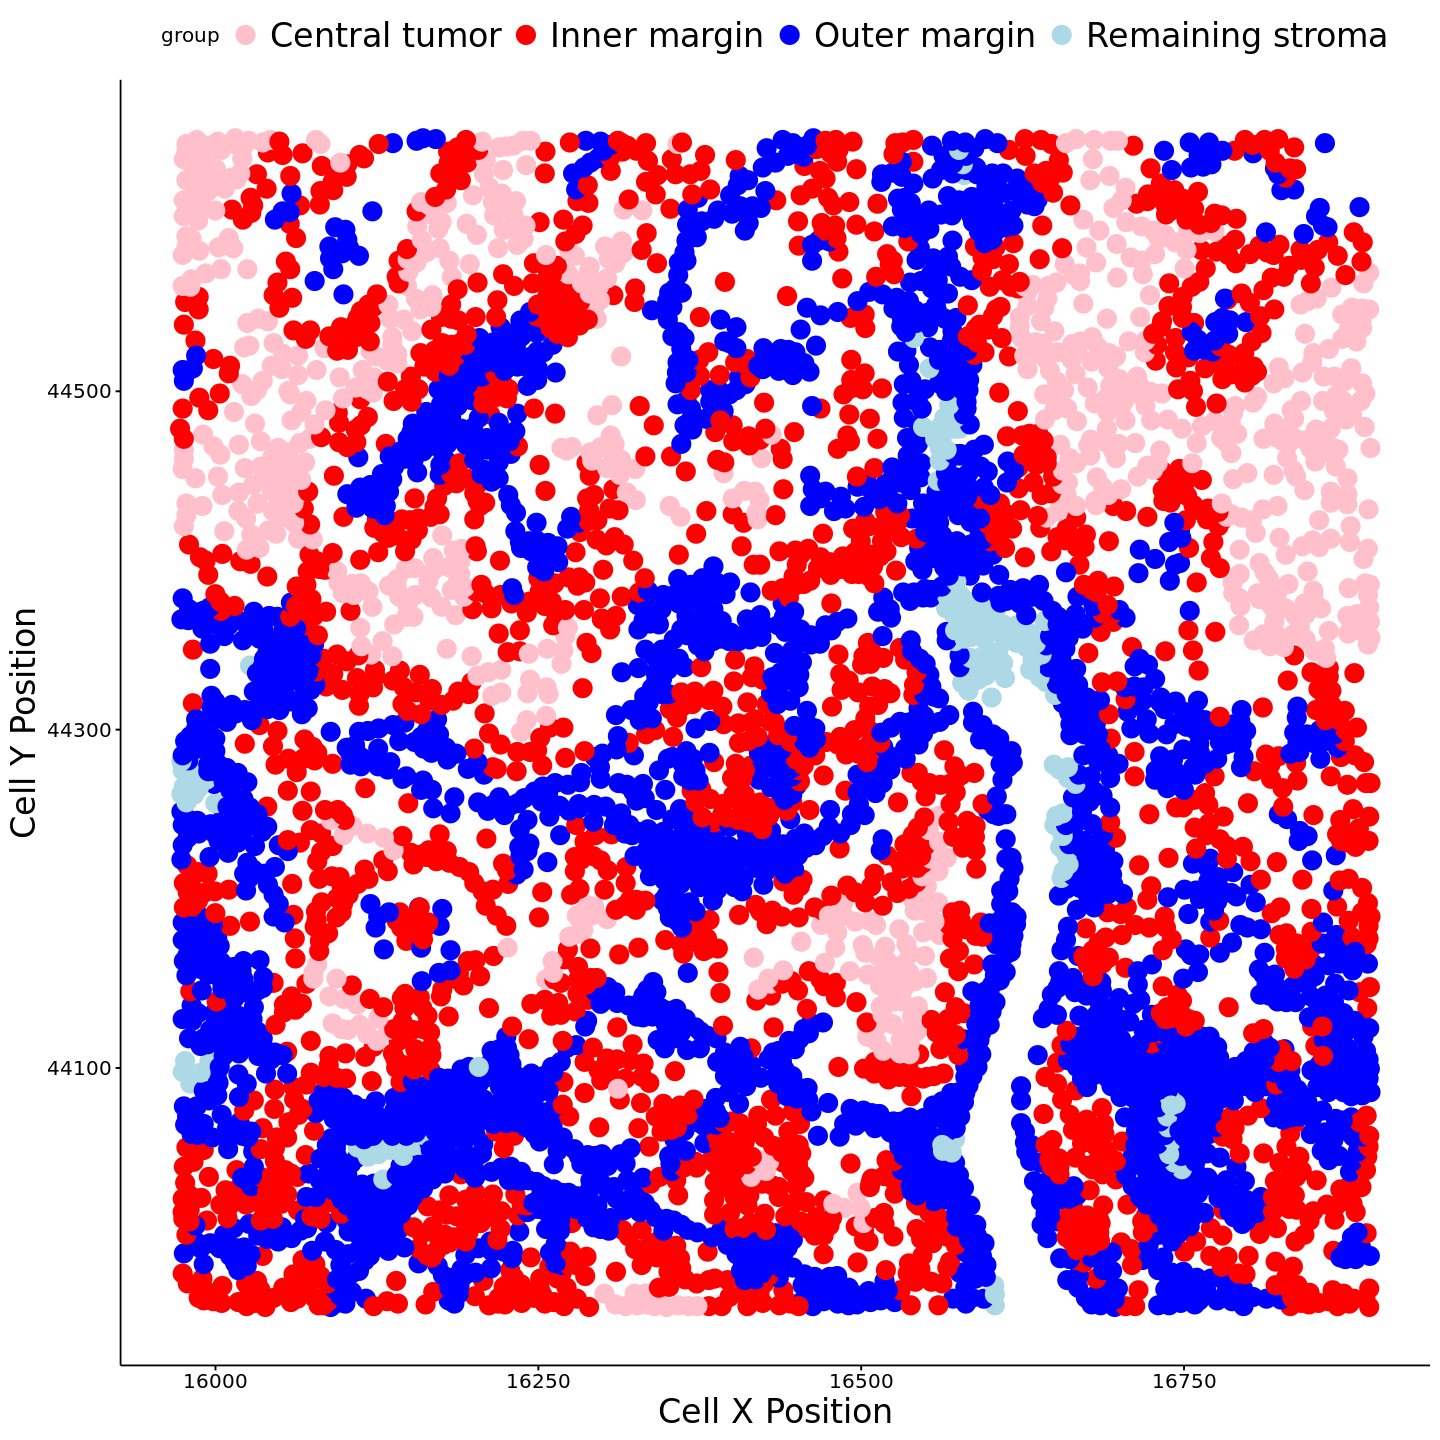

In [167]:
options(repr.plot.height=12,repr.plot.width = 12)
sub <- clean.csd
dst <- phenoptr::distance_matrix(sub) # Compute this just once and re-use it
ck <- sub$tissue == 'Tumor'
sd.1 <- dst[ck,]
close.1 <- (sd.1 > 0) & (sd.1 <= 35)
outer.margin <- (colSums(close.1) >= 1) & (sub$tissue == 'Stroma')
sd.2 <- dst[sub$tissue == 'Stroma',]
close.2 <- (sd.2 > 0) & (sd.2 <= 35)
inner.margin <- (colSums(close.2) >= 1) & ck
sub$group[ck & !inner.margin] <- "Central tumor"
sub$group[inner.margin] <- 'Inner margin'
sub$group[sub$tissue == 'Stroma' & !outer.margin ] <- 'Remaining stroma'
sub$group[outer.margin] <- 'Outer margin'
ggscatter(sub,
         x ='Cell X Position',
         y = 'Cell Y Position',
         color = 'group',
         size = 5,
         palette = c('pink','red','blue','lightblue')
         ) + 
        theme(axis.title=element_text(size=20),
              legend.text = element_text(size = 20))


# Loop through files and measure how many cells in the margins

In [ ]:
fns <- list.files(inform.data,pattern = '*cell_seg_data.txt')
length(fns)


In [107]:
head(csd,n=1)

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,⋯,TMA Field,Confidence-CD3,Confidence-PDL1,Confidence-CK,Confidence-CD8,Confidence-PD1,Confidence-FOXP3,inForm 2.6.7900.18857,Phenotype,combined.pheno
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,other,other,other,other,other,other,1,⋯,0,99.72%,100.00%,99.98%,99.80%,99.67%,100.00%,NA,,


In [138]:
names(cell.defs$'Treg')

[1] "Phenotype-CD3"   "Phenotype-FOXP3"

In [152]:
colnames(csd)[colnames(csd) %like% "PD-1"]

[1] "Nucleus PD-1 (Opal 620) Min (Normalized Counts, Total Weighting)"        
 [2] "Nucleus PD-1 (Opal 620) Mean (Normalized Counts, Total Weighting)"       
 [3] "Nucleus PD-1 (Opal 620) Max (Normalized Counts, Total Weighting)"        
 [4] "Nucleus PD-1 (Opal 620) Std Dev (Normalized Counts, Total Weighting)"    
 [5] "Nucleus PD-1 (Opal 620) Total (Normalized Counts, Total Weighting)"      
 [6] "Cytoplasm PD-1 (Opal 620) Min (Normalized Counts, Total Weighting)"      
 [7] "Cytoplasm PD-1 (Opal 620) Mean (Normalized Counts, Total Weighting)"     
 [8] "Cytoplasm PD-1 (Opal 620) Max (Normalized Counts, Total Weighting)"      
 [9] "Cytoplasm PD-1 (Opal 620) Std Dev (Normalized Counts, Total Weighting)"  
[10] "Cytoplasm PD-1 (Opal 620) Total (Normalized Counts, Total Weighting)"    
[11] "Membrane PD-1 (Opal 620) Min (Normalized Counts, Total Weighting)"       
[12] "Membrane PD-1 (Opal 620) Mean (Normalized Counts, Total Weighting)"      
[13] "Membrane PD-1 (Opal 620) Max (Normalized Counts, Total Weighting)"       
[14] "Membrane PD-1 (Opal 620) Std Dev (Normalized Counts, Total Weighting)"   
[15] "Membrane PD-1 (Opal 620) Total (Normalized Counts, Total Weighting)"     
[16] "Entire Cell PD-1 (Opal 620) Min (Normalized Counts, Total Weighting)"    
[17] "Entire Cell PD-1 (Opal 620) Mean (Normalized Counts, Total Weighting)"   
[18] "Entire Cell PD-1 (Opal 620) Max (Normalized Counts, Total Weighting)"    
[19] "Entire Cell PD-1 (Opal 620) Std Dev (Normalized Counts, Total Weighting)"
[20] "Entire Cell PD-1 (Opal 620) Total (Normalized Counts, Total Weighting)"

In [197]:
cd8.t <- list('Phenotype-CD3' = 'CD3+',
              'Phenotype-CD8' = 'CD8+')

treg <- list('Phenotype-CD3' = 'CD3+',
             'Phenotype-FOXP3' = 'FOXP3+')

cell.defs <- list('cd8.t' = cd8.t,
                  'treg' = treg,
                 'CK.pd1' =  list('Phenotype-CK' = 'CK+',
                                  'Phenotype-PD1' = 'PD1+'))

# treg.ratio <-    list('cd8.t' = cd8.t,
#                        'treg' = treg)
# expression <- list('pdl1' = 'Entire Cell PD-L1 (Opal 520) Mean (Normalized Counts, Total Weighting)')

# analyses <- c('percent' = cell.densities,
#               'treg.ratio' = treg.ratio,
#               'expression' = expression)

                
for (a in names(analyses)){
    print(a)
    defs <- analyses[[a]]
    for (type in names(defs)){
        print(type)
    }
}
                  

[1] "percent.cd8.t"
[1] "Phenotype-CD3"
[1] "Phenotype-CD8"
[1] "percent.treg"
[1] "Phenotype-CD3"
[1] "Phenotype-FOXP3"
[1] "treg.ratio.cd8.t"
[1] "Phenotype-CD3"
[1] "Phenotype-CD8"
[1] "treg.ratio.treg"
[1] "Phenotype-CD3"
[1] "Phenotype-FOXP3"
[1] "expression.pdl1"


In [188]:
cell

[1] "cd8.t"

In [199]:
sub <- clean.csd
sub$cell.type <- 'other'
for (cell in names(cell.defs)) {
    print(cell)
    idx <- rep_len(TRUE, dim(sub)[1])
    def <- cell.defs[[cell]]
    for (col in names(def)){
        print(col)
        idx <- idx & (sub[col] == def[[col]])
    }
    # print(sub[idx,1:10])
    print(sum(idx))
    sub[idx, 'cell.type'] <- cell
}
sub %>% count(cell.type)

[1] "cd8.t"
[1] "Phenotype-CD3"
[1] "Phenotype-CD8"
[1] 1
[1] "treg"
[1] "Phenotype-CD3"
[1] "Phenotype-FOXP3"
[1] 0
[1] "CK.pd1"
[1] "Phenotype-CK"
[1] "Phenotype-PD1"
[1] 208


cell.type,n
<chr>,<int>
CK.pd1,208
cd8.t,1
other,5207


# Main file clean and tissue compartment defining loop

In [ ]:
fns <- list.files(inform.data,pattern = '*cell_seg_data.txt')
# fns <- c('RACTIH_Scan1_[16434,44304]_cell_seg_data.txt')
start_time <- Sys.time()
cd8.t <- list('Phenotype-CD3' = 'CD3+',
              'Phenotype-CD8' = 'CD8+',
              'Phenotype-FOXP3' = 'other'
              )

treg <- list('Phenotype-CD3' = 'CD3+',
             'Phenotype-CD8' = 'other',
             'Phenotype-FOXP3' = 'FOXP3+')

panck <- list('Phenotype-CD3' = 'other',
              'Phenotype-FOXP3' = 'other',
              'Phenotype-CD8' = 'other',
              'Phenotype-CK' = 'CK+')

# panck.neg <- list('Phenotype-CK' = 'other')

cell.defs <- list('panck' = panck,
                  'cd8.t' = cd8.t,
                  'treg' = treg)

labs <- c('CK','PDL1','CD3','CD8','PD1','FOXP3')
pheno.conf <- 25
keep.cols <- c('Sample Name', 'fn', 'Cell ID',
               'cell.type','all.tumor.stroma', 'tissue.compartment',
               'pdl1.expression', 'pd1.expression','combined.pheno',
               'is.pdl1.cell','is.panck.cell')
# df <- data.frame(matrix(NA, nrow = length(fns), ncol = 5), row.names=fns)
df <- data.frame(c())
dist = 35

for (fn in fns){
    csd <- read.csv(file.path(inform.data,fn),
               sep = '\t',
               check.names=FALSE) #check.names=FALSE will prevent replacing spaces with periods\
    clean.csd <- csd[csd[,'Tissue Category'] != 'Blank',]
    clean.csd$combined.pheno <- ''
    for (label in labs){
        pheno.col = sprintf('Phenotype-%s',label)
        conf.col = sprintf('Confidence-%s',label)
        pheno = clean.csd[,pheno.col]
        conf = clean.csd[,conf.col]
        pheno[pheno=='other'] = ''
        pheno[conf < pheno.conf] = ''
        clean.csd$combined.pheno <- paste0(clean.csd$combined.pheno,pheno)
        pheno[pheno == ''] <- 'other'
        clean.csd[,pheno.col] <- pheno
    }
   
    # Rename cells with no labeling:    
    clean.csd$combined.pheno[clean.csd$combined.pheno == ''] = 'other'
    clean.csd$tissue <- clean.csd[,'Tissue Category']
    
    sub <- clean.csd
    dst <- phenoptr::distance_matrix(sub) # Compute this just once and re-use it
    tmr <- sub$tissue == 'Tumor'
    str <- sub$tissue == 'Stroma'
    
    #Define outer margin
    sd.1 <- dst[tmr,]
    close.1 <- (sd.1 > 0) & (sd.1 <= dist)
    outer.margin <- (colSums(close.1) >= 1) & str
    
    #Define inner margin
    sd.2 <- dst[str,]
    close.2 <- (sd.2 > 0) & (sd.2 <= dist)
    inner.margin <- (colSums(close.2) >= 1) & tmr
    
    #Distal & central
    distal <- (str & !outer.margin)
    central <- (tmr & !inner.margin)
    
    #Add fields
    sub$tissue.compartment[distal] <- 'distal.stroma'
    sub$tissue.compartment[central] <- "central.tumor"
    sub$tissue.compartment[inner.margin] <- 'inner.tumor.inv.margin'   
    sub$tissue.compartment[outer.margin] <- 'outer.tumor.inv.margin'
    sub$pdl1.expression <- sub[,'Entire Cell PD-L1 (Opal 520) Mean (Normalized Counts, Total Weighting)']
    sub$pd1.expression <- sub[,'Entire Cell PD-1 (Opal 620) Mean (Normalized Counts, Total Weighting)']
    sub$cell.type <- 'other'
    sub$is.pdl1.cell <- sub[,'Phenotype-PDL1'] == 'PDL1+'
    sub$is.panck.cell <- sub[,'Phenotype-CK'] == 'CK+'
    sub$all.tumor.stroma <- sub$tissue
    sub$fn <- fn
    for (cell in names(cell.defs)) {
        # print(cell)
        idx <- rep_len(TRUE, dim(sub)[1])
        def <- cell.defs[[cell]]
        for (col in names(def)){
            # print(col)
            idx <- idx & (sub[col] == def[[col]])
        }
        # print(sum(idx))
        sub[idx, 'cell.type'] <- cell
    }
    df<- rbind(df,sub[,keep.cols])
}
fn <- file.path(results,sprintf('NRG-HN003-%dcell-measurements_%dcol.csv',dim(df)[1],dim(df)[2]))
print(fn)
write.csv(df,fn)
head(df)
stop_time <- Sys.time()
print(paste('Time elapsed:',(stop_time - start_time)/60,'minutes'))

In [248]:
stopped.at <- 'RACVLA_Scan1_[15738,42564]_cell_seg_data.txt'

[1] 7552156      11

In [250]:
fn <- file.path(results,sprintf('NRG-HN003-%dcell-measurements_%dcol.csv',dim(df)[1],dim(df)[2]))
print(fn)
write.csv(df,fn)
print('finished')

[1] "/mnt/results/NRG-HN003-7552156cell-measurements_11col.csv"
[1] "finished"


In [255]:
i <- 1:length(fns)
stopped.at <- 'RACVLA_Scan1_[15738,42564]_cell_seg_data.txt'
i[fns == stopped.at]

[1] 2029

In [256]:
length(unique(df$fn))

[1] 2029

In [257]:
tail(df)

,Sample Name,fn,Cell ID,cell.type,all.tumor.stroma,tissue.compartment,pdl1.expression,pd1.expression,combined.pheno,is.pdl1.cell,is.panck.cell
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
7149114,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9178,other,Stroma,outer.tumor.inv.margin,0.108,0.135,other,FALSE,FALSE
7150114,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9179,panck,Tumor,inner.tumor.inv.margin,0.091,0.155,CK+,FALSE,TRUE
71511000,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9180,other,Stroma,outer.tumor.inv.margin,0.397,0.165,other,FALSE,FALSE
7152114,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9181,panck,Tumor,inner.tumor.inv.margin,0.209,0.256,CK+,FALSE,TRUE
7153114,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9182,other,Tumor,central.tumor,0.384,0.274,other,FALSE,FALSE
7155114,RACVLA_Scan1.qptiff,"RACVLA_Scan1_[15738,42564]_cell_seg_data.txt",9184,panck,Tumor,inner.tumor.inv.margin,0.877,0.263,CK+PD1+,FALSE,TRUE
